# Preprocessing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 為了處理方便，把 'train.csv' 和 'test.csv' 合併起來，'test.csv'的 Weather 欄位用 0 補起來。
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_test['Weather'] = np.zeros((len(df_test),))                                                                                                                              

# 以 train_end_idx 作為 'train.csv' 和 'test.csv' 分界列，
train_end_idx = len(df)
df = pd.concat([df, df_test], sort=False)

In [3]:
# fill up missing values to median
df = df.fillna(value=df.mean())

In [4]:
# convert non-numerical to numerical
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

df['Date'] = df['Date'].astype(str)
df['Loc'] = df['Loc'].astype(str)
df['WindDir']= df['WindDir'].astype(str)
df['DayWindDir'] = df['DayWindDir'].astype(str)
df['NightWindDir'] = df['NightWindDir'].astype(str)

df['Date'] = le.fit_transform(df['Date'])
df['Loc'] = le.fit_transform(df['Loc'])
df['WindDir'] = le.fit_transform(df['WindDir'])
df['DayWindDir'] = le.fit_transform(df['DayWindDir'])
df['NightWindDir'] = le.fit_transform(df['NightWindDir'])

In [5]:
# check data types
df.dtypes

Date                int64
Loc                 int64
TempLow           float64
TempHigh          float64
Steaming          float64
Sun               float64
WindDir             int64
WindSpeed         float64
DayWindDir          int64
NightWindDir        int64
DayWindSpeed      float64
NightWindSpeed    float64
DayHumidity       float64
NightHumidity     float64
DayPressure       float64
NightPressure     float64
DayCloud          float64
NightCloud        float64
DayTemp           float64
NightTemp         float64
Weather           float64
RISK_MM           float64
dtype: object

In [6]:
# drop unnecessay data
df = df.drop(columns=["Date","Loc"])

df.head(10)

,TempLow,TempHigh,Steaming,Sun,WindDir,WindSpeed,DayWindDir,NightWindDir,DayWindSpeed,NightWindSpeed,DayHumidity,NightHumidity,DayPressure,NightPressure,DayCloud,NightCloud,DayTemp,NightTemp,Weather,RISK_MM
0,19.500000,23.741634,5.694960,0.500000,1,61.000000,1,1,31.000000,22.000000,86.641375,41.810006,1020.400000,1021.90000,4.154681,7.00000,17.190022,19.600000,0.0,1.772145
1,2.100000,15.700000,5.701668,5.700000,0,26.000000,16,9,9.000000,7.000000,53.275715,76.598048,1023.700000,1020.80000,4.000000,1.00000,9.000000,14.100000,0.0,0.000000
2,20.900000,36.100000,5.694960,8.003251,8,39.000000,8,12,31.000000,17.000000,15.471574,52.163254,1017.100000,1014.90000,4.167266,4.27812,24.200000,33.900000,0.0,0.000000
3,11.500000,23.900000,5.694960,7.993227,5,35.000000,13,16,7.000000,17.000000,46.442398,67.664733,1010.200000,1015.47264,4.167266,4.27812,13.800000,21.800000,1.0,0.200000
4,8.200000,20.500000,3.200000,8.003251,3,69.000000,3,14,13.739091,18.424823,51.830889,51.770240,1018.043992,1001.20000,7.000000,7.00000,17.190022,17.600000,0.0,0.600000
5,9.700000,24.100000,5.694960,8.003251,4,31.000000,9,0,11.000000,19.000000,49.816899,58.470225,1022.900000,1015.47264,4.167266,4.27812,17.800000,23.200000,0.0,0.000000
6,6.000000,12.800000,1.000000,7.400000,15,39.366587,15,13,28.000000,26.000000,70.879656,59.672191,1029.400000,1030.30000,4.154681,4.00000,17.190022,22.169457,1.0,2.400000
7,7.100000,15.500000,2.400000,7.993227,16,35.000000,11,8,15.000000,13.000000,39.138422,68.123428,1024.000000,1015.47264,1.000000,4.00000,9.600000,14.800000,0.0,0.000000
8,16.500000,25.400000,5.694960,7.993227,5,39.366587,5,4,26.000000,18.424823,63.983249,60.008262,1004.700000,1000.80000,4.167266,4.27812,18.900000,21.700000,0.0,0.000000
9,12.110114,13.800000,4.700000,5.200000,16,65.000000,13,15,28.000000,33.000000,58.973981,68.960339,1014.800000,1015.47264,4.154681,4.27812,10.100000,12.000000,1.0,3.000000


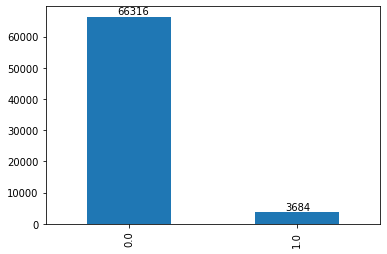

In [7]:
# check imbalance problem
ax = df['Weather'].value_counts().plot(kind = 'bar')

for i in ax.patches:
    ax.text(i.get_x() + 0.18, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=10)

# Create validation data (Standardize, Eliminate imbalance data)

In [8]:
# Split validation data from train data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    df.drop(columns = ['Weather']).values[:train_end_idx, :],
    df['Weather'].values[:train_end_idx], test_size=0.25)

# Drop 'Weather' from test data
X_test = df.drop(columns = ['Weather']).values[train_end_idx:, :]
df_test.head(10)

,Date,Loc,TempLow,TempHigh,Steaming,Sun,WindDir,WindSpeed,DayWindDir,NightWindDir,...,DayHumidity,NightHumidity,DayPressure,NightPressure,DayCloud,NightCloud,DayTemp,NightTemp,RISK_MM,Weather
0,2016/7/22,Ballarat,6.9,23.5,5.69496,NaN,N,41.00000,NNE,N,...,43.950026,NaN,1028.00000,1025.100000,1.000000,NaN,16.70000,NaN,0.0,0.0
1,NaN,SalmonGums,4.2,21.5,5.69496,7.993227,WNW,35.00000,NaN,NaN,...,34.682783,63.653409,1018.03427,1015.465952,4.167266,4.27812,13.80000,20.900000,NaN,0.0
2,NaN,AliceSprings,24.4,39.6,14.60000,NaN,SSE,44.00000,SSW,NaN,...,9.820135,45.476982,1014.10000,1010.400000,0.000000,2.00000,31.50000,38.000000,0.0,0.0
3,2012/7/30,Launceston,10.8,21.5,5.69496,7.993227,WNW,39.00000,SSE,NaN,...,49.095435,48.865800,NaN,1021.000000,NaN,NaN,NaN,19.900000,NaN,0.0
4,NaN,Darwin,27.3,NaN,4.40000,3.500000,NW,28.00000,SW,NW,...,66.034683,64.548346,1012.80000,1008.200000,7.000000,7.00000,29.30000,32.000000,1.6,0.0
5,2014/2/10,Newcastle,NaN,NaN,5.69496,7.993227,NaN,39.38315,NaN,NaN,...,53.412785,69.079704,NaN,1015.465952,7.000000,4.27812,15.80000,22.157059,0.0,0.0
6,2016/8/22,Bendigo,3.1,12.2,NaN,7.993227,W,NaN,WNW,W,...,51.498261,NaN,1019.10000,1017.900000,7.000000,NaN,6.50000,11.700000,0.0,0.0
7,2012/5/1,Albury,NaN,27.9,5.69496,NaN,W,NaN,NaN,NaN,...,48.567788,60.805572,NaN,1015.000000,NaN,5.00000,16.80000,23.900000,NaN,0.0
8,NaN,MountGinini,8.2,14.5,5.69496,NaN,W,NaN,NaN,WNW,...,NaN,36.638441,1018.03427,1015.465952,4.167266,4.27812,17.16263,12.500000,13.6,0.0
9,2016/6/16,NaN,10.6,27.6,NaN,10.800000,W,24.00000,NaN,SW,...,29.829395,NaN,NaN,1020.500000,4.167266,4.27812,20.20000,26.300000,0.0,0.0


In [9]:
# Standardized data X other than weather
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_val_std = sc.transform(X_val)

X_train_std.shape

(26367, 19)

In [10]:
conda install -c conda-forge imbalanced-learn

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [11]:
conda update scikit-learn

Solving environment: | 

Updating scikit-learn is constricted by 

anaconda -> requires scikit-learn==0.22.1=py37h27c97d8_0

If you are sure you want an update of your package either try `conda update --all` or install a specific version of the package you want using `conda install <pkg>=<version>`

done

## Package Plan ##

  environment location: /Users/samjanity996/opt/anaconda3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    applaunchservices-0.2.1    |             py_0           8 KB  conda-forge
    asn1crypto-1.3.0           |           py37_0         159 KB  conda-forge
    attrs-19.3.0               |             py_0          35 KB  conda-forge
    backports-1.0              |             py_2           4 KB  conda-forge
    backports.functools_lru_cache-1.6.4|     pyhd8ed1ab_0           9 KB  conda-forge
    backports.tempfile-1.0

backports.functools_ | 9 KB      | ##################################### | 100% 
backports.tempfile-1 | 10 KB     | ##################################### | 100% 
xmltodict-0.12.0     | 11 KB     | ##################################### | 100% 
attrs-19.3.0         | 35 KB     | ##################################### | 100% 
wheel-0.34.2         | 43 KB     | ##################################### | 100% 
asn1crypto-1.3.0     | 159 KB    | ##################################### | 100% 
importlib_metadata-1 | 42 KB     | ##################################### | 100% 
imagesize-1.2.0      | 8 KB      | ##################################### | 100% 
pexpect-4.8.0        | 79 KB     | ##################################### | 100% 
python-dateutil-2.8. | 220 KB    | ##################################### | 100% 
pysocks-1.7.1        | 27 KB     | ##################################### | 100% 
pyopenssl-19.1.0     | 83 KB     | ##################################### | 100% 
ptyprocess-0.6.0     | 22 KB

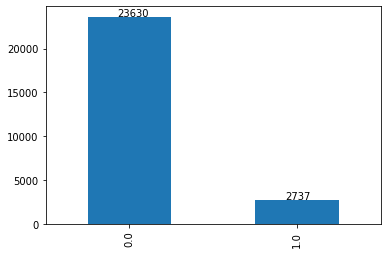

In [12]:
# check y_train data distribution and still have imbalance problem
plot_y = pd.DataFrame(y_train, columns = ['Weather'])
a = plot_y['Weather'].value_counts().plot(kind='bar')

for i in a.patches:
    a.text(i.get_x() + 0.18, i.get_height() + 100, str(round(i.get_height(), 2)), fontsize=10)

# Dimension reduction (principle components analysis)

In [13]:
# 降維度
#from sklearn.decomposition import PCA
#pca = PCA(17,random_state = 9527)
#pca.fit(X_train_std)
#X_train_std_pca = pca.transform(X_train_std)
#X_test_std_pca = pca.transform(X_test_std)
#X_val_std_pca = pca.transform(X_val_std)

#X_train_std_pca.shape
#X_test_std_pca.shape
#X_val_std_pca.shape

# SMOTE + Edited Nearest Neighbors (Oversampling + Undersampling)

In [14]:
# deal with data imbalance training data
# resampling
from imblearn.over_sampling import BorderlineSMOTE

sm = BorderlineSMOTE(random_state=42)
X_train_std_sm,y_train_sm = sm.fit_resample(X_train_std,y_train)

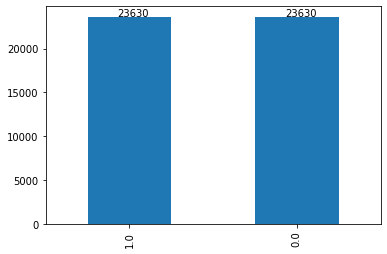

In [15]:
# check y_train_sm data distribution
plot_y = pd.DataFrame(y_train_sm, columns = ['Weather'])
b = plot_y['Weather'].value_counts().plot(kind='bar')

for i in b.patches:
    b.text(i.get_x() + 0.18, i.get_height() + 100, str(round(i.get_height(), 2)), fontsize=10)

# Model training

## Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

#train tree model
model = DecisionTreeClassifier()
model.fit(X_train_std_sm,y_train_sm)

#predict
y_pred_decision = model.predict(X_val_std)
print('Accuracy: %f' % accuracy_score(y_val, y_pred_decision))
print('Recall: %f' % recall_score(y_val, y_pred_decision))
print('f1-score: %f' % f1_score(y_val, y_pred_decision))

Accuracy: 0.816589
Recall: 0.332629
f1-score: 0.280999


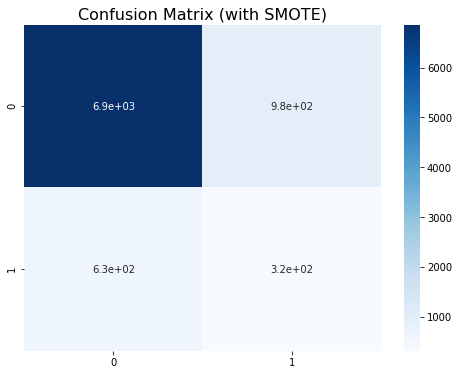

In [17]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_val, y_pred_decision)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [18]:
# Output predicted weather data to csv
ans_pred = model.predict(X_test_std)
df_sap = pd.DataFrame(ans_pred.astype(int), columns = ['Weather'])
df_sap.to_csv('myAns_DecisionTree.csv',  index_label = 'Id')

## Random Forest (Great result)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

#train tree model
model = RandomForestClassifier(n_estimators=100,random_state=9,max_depth=9,n_jobs=4)
model.fit(X_train_std_sm,y_train_sm)

#predict
y_pred_decision = model.predict(X_val_std)
print('Accuracy: %f' % accuracy_score(y_val, y_pred_decision))
print('Recall: %f' % recall_score(y_val, y_pred_decision))
print('f1-score: %f' % f1_score(y_val, y_pred_decision))

Accuracy: 0.818182
Recall: 0.574446
f1-score: 0.405063


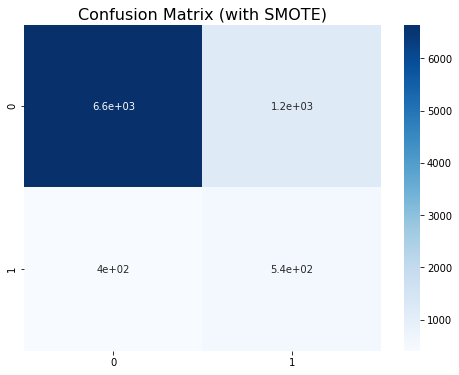

In [20]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_val, y_pred_decision)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [21]:
# Output predicted weather data to csv
ans_pred = model.predict(X_test_std)
df_sap = pd.DataFrame(ans_pred.astype(int), columns = ['Weather'])
df_sap.to_csv('myAns_RandomForest.csv',  index_label = 'Id')

## SVM

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score

#train tree model
model = SVC()
model.fit(X_train_std_sm,y_train_sm)

#predict
y_pred_decision = model.predict(X_val_std)
print('Accuracy: %f' % accuracy_score(y_val, y_pred_decision))
print('Recall: %f' % recall_score(y_val, y_pred_decision))
print('f1-score: %f' % f1_score(y_val, y_pred_decision))

Accuracy: 0.804528
Recall: 0.620908
f1-score: 0.406358


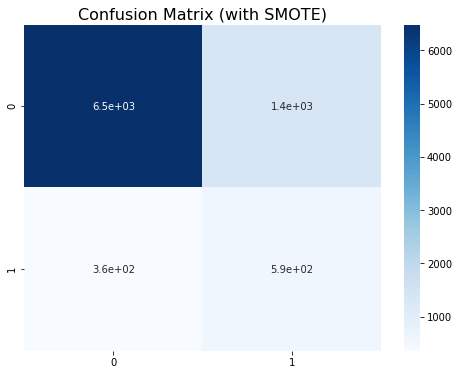

In [23]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_val, y_pred_decision)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [24]:
# Output predicted weather data to csv
ans_pred = model.predict(X_test_std)
df_sap = pd.DataFrame(ans_pred.astype(int), columns = ['Weather'])
df_sap.to_csv('myAns_SVM.csv',  index_label = 'Id')

## KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

#train tree model
model = KNeighborsClassifier(n_neighbors=25, weights='uniform')
model.fit(X_train_std_sm,y_train_sm)

#predict
y_pred_decision = model.predict(X_val_std)
print('Accuracy: %f' % accuracy_score(y_val, y_pred_decision))
print('Recall: %f' % recall_score(y_val, y_pred_decision))
print('f1-score: %f' % f1_score(y_val, y_pred_decision))

Accuracy: 0.690977
Recall: 0.765576
f1-score: 0.348056


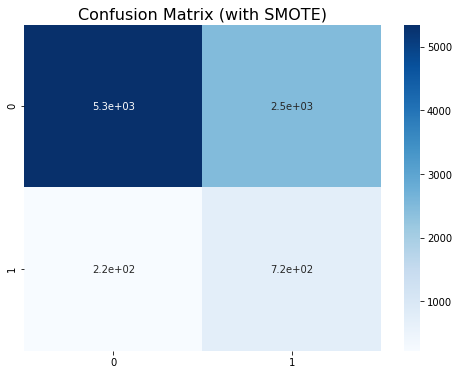

In [26]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_val, y_pred_decision)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [27]:
# Output predicted weather data to csv
ans_pred = model.predict(X_test_std)
df_sap = pd.DataFrame(ans_pred.astype(int), columns = ['Weather'])
df_sap.to_csv('myAns_KNN.csv',  index_label = 'Id')

## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score

#train tree model
model = LogisticRegression()
model.fit(X_train_std_sm,y_train_sm)

#predict
y_pred_decision = model.predict(X_val_std)
print('Accuracy: %f' % accuracy_score(y_val, y_pred_decision))
print('Recall: %f' % recall_score(y_val, y_pred_decision))
print('f1-score: %f' % f1_score(y_val, y_pred_decision))

Accuracy: 0.761179
Recall: 0.706441
f1-score: 0.389293


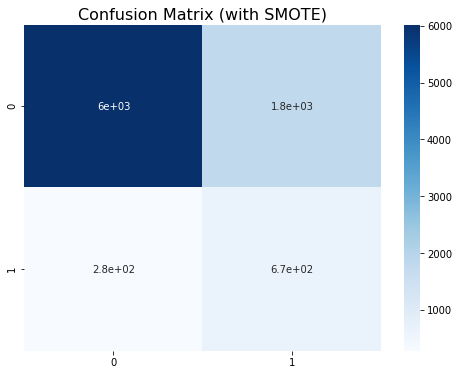

In [29]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_val, y_pred_decision)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [30]:
# Output predicted weather data to csv
ans_pred = model.predict(X_test_std)
df_sap = pd.DataFrame(ans_pred.astype(int), columns = ['Weather'])
df_sap.to_csv('myAns_LR.csv',  index_label = 'Id')

## Gaussian NB

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, recall_score

#train tree model
model = GaussianNB()
model.fit(X_train_std_sm,y_train_sm)

#predict
y_pred_decision = model.predict(X_val_std)
print('Accuracy: %f' % accuracy_score(y_val, y_pred_decision))
print('Recall: %f' % recall_score(y_val, y_pred_decision))
print('f1-score: %f' % f1_score(y_val, y_pred_decision))

Accuracy: 0.757765
Recall: 0.673706
f1-score: 0.374743


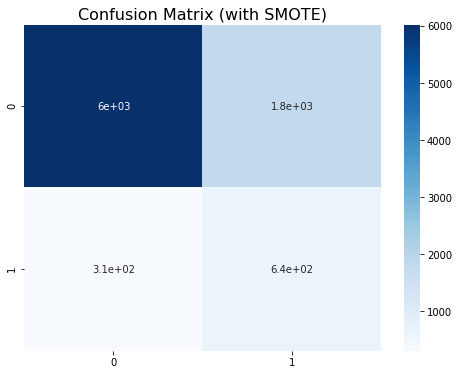

In [32]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_val, y_pred_decision)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [33]:
# Output predicted weather data to csv
ans_pred = model.predict(X_test_std)
df_sap = pd.DataFrame(ans_pred.astype(int), columns = ['Weather'])
df_sap.to_csv('myAns_Gaussian NB.csv',  index_label = 'Id')

## XGBoost

In [34]:
#brew install gcc5

In [35]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [36]:
#brew install libomp

In [37]:
#找參數
#from sklearn.model_selection import GridSearchCV

#param_dist = {"max_depth": [10,30,50],"min_child_weight" : [1,3,6],"n_estimators": [200],"learning_rate": [0.05, 0.1,0.16],}
#grid_search = GridSearchCV(XGBClassifier(), param_grid=param_dist, cv = 3, verbose=10, n_jobs=8, scoring='f1')
#grid_search.fit(X_train_std_sm, y_train_sm)

In [38]:
#grid_search.best_estimator_

In [39]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

#train tree model
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,use_label_encoder=False)
model.fit(X_train_std_sm,y_train_sm)


#predict
y_pred_decision = model.predict(X_val_std)
print('Accuracy: %f' % accuracy_score(y_val, y_pred_decision))
print('Recall: %f' % recall_score(y_val, y_pred_decision))
print('f1-score: %f' % f1_score(y_val, y_pred_decision))

[20:39:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.859028
Recall: 0.524815
f1-score: 0.445141


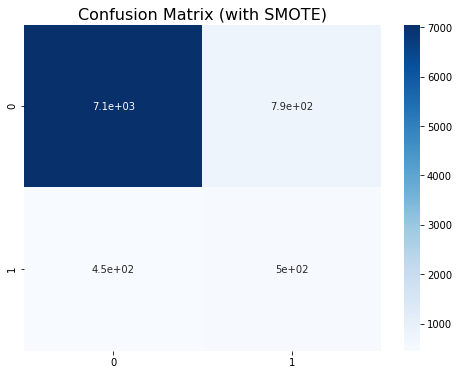

In [40]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_val, y_pred_decision)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [41]:
# Output predicted weather data to csv
ans_pred = model.predict(X_test_std)
df_sap = pd.DataFrame(ans_pred.astype(int), columns = ['Weather'])
df_sap.to_csv('myAns_XGBoost.csv',  index_label = 'Id')

/Users/samjanity996/opt/anaconda3/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


## Light GBM (The best result)

In [42]:
conda install lightgbm

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [43]:
#找參數
#from sklearn.model_selection import GridSearchCV

#param_dist = {"max_depth": [13],"learning_rate" : [0.01,0.05,0.1],"num_leaves": [10,100],"n_estimators": [100,1000]}
#grid_search = GridSearchCV(lgb.LGBMClassifier(), n_jobs=8, param_grid=param_dist, cv = 3, scoring="f1", verbose=5)
#grid_search.fit(X_train_std,y_train)
#grid_search.best_estimator_

In [44]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, recall_score

#train tree model
model = lgb.LGBMClassifier(max_depth=12, n_estimators=203, scale_pos_weight=4, num_leaves=21)
model.fit(X_train_std_sm,y_train_sm)


#predict
y_pred_decision = model.predict(X_val_std)
print('Accuracy: %f' % accuracy_score(y_val, y_pred_decision))
print('Recall: %f' % recall_score(y_val, y_pred_decision))
print('f1-score: %f' % f1_score(y_val, y_pred_decision))

/Users/samjanity996/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


Accuracy: 0.844237
Recall: 0.635692
f1-score: 0.467936


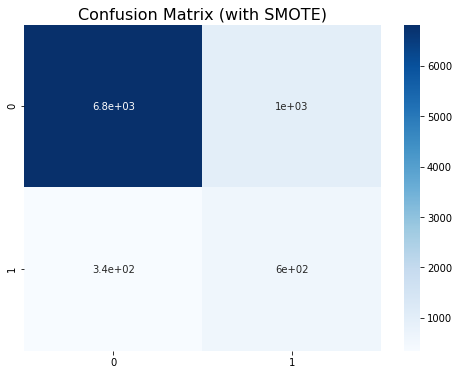

In [45]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_val, y_pred_decision)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues')

In [46]:
# Output predicted weather data to csv
ans_pred = model.predict(X_test_std)
df_sap = pd.DataFrame(ans_pred.astype(int), columns = ['Weather'])
df_sap.to_csv('myAns_LightGBM.csv',  index_label = 'Id')